In [1]:
!pip install pandas_datareader==0.7.0
from IPython.core.debugger import set_trace
import yfinance as yf
import os, pickle
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

### Import plotting things:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, laplace, johnsonsu
from scipy import stats
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('2018tradesTicks.csv',names=['UTCDate_UTCTime', 'Price', 'Quantity', 'isBuy', 'isSell'])
# Preview the first N lines of the loaded data 
da_max=df['Quantity']
da_max.min()
df

,UTCDate_UTCTime,Price,Quantity,isBuy,isSell
0,2017-12-11 00:00:12.196,2656.25,2,0,1
1,2017-12-11 00:00:12.196,2656.25,3,0,1
2,2017-12-11 00:00:12.196,2656.25,1,0,1
3,2017-12-11 00:00:12.196,2656.25,2,0,1
4,2017-12-11 00:00:12.197,2656.25,4,0,1
...,...,...,...,...,...
4166481,2018-02-02 21:59:59.396,2757.25,1,0,1
4166482,2018-02-02 21:59:59.541,2757.25,3,0,1
4166483,2018-02-02 21:59:59.543,2757.25,1,0,1
4166484,2018-02-02 21:59:59.787,2757.25,1,0,1


       Price  Count
0    2656.25     14
1    2656.00     28
2    2655.75     51
3    2655.50    159
4    2655.25    300
..       ...    ...
903  2877.50    613
904  2877.75    640
905  2878.00    553
906  2878.25    147
907  2878.50    129

[908 rows x 2 columns]


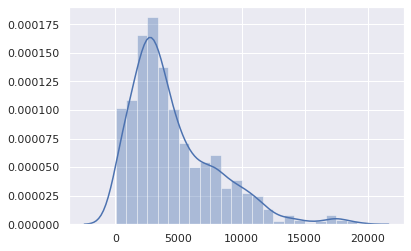

In [3]:
da_max[da_max>256]
type(da_max)

df_precios_unique=df['Price'].unique()


precios_unique = df.pivot_table(index=['Price'], aggfunc='size')

df_precios = pd.DataFrame()
df_precios['Price']=df_precios_unique
df_precios['Count']=precios_unique.tolist()

sns.distplot(precios_unique);
print(df_precios)    


In [11]:
partition=64

df_split = np.array_split(df_precios, partition)

indice=0
for dataframe in df_split:
    arr_temp_values=[]
    arr_temp_price=[]
    for index, row in df_split[indice].iterrows():
        value=row['Count']/df_split[indice]['Count'].sum()
        price=row['Price']
        arr_temp_values.append(value)
        arr_temp_price.append(price)
        
    minimum=[]   
    maximum=[]
    suma=[]
    peak=[]
    minimum.append(df_split[indice]['Count'].min())
    maximum.append(df_split[indice]['Count'].max())
    suma.append(df_split[indice]['Count'].sum())
    peak.append(str((maximum[0]-minimum[0])/suma[0]))
    
    
    df_temp_peak=pd.DataFrame()
    df_temp_peak['MIN']=minimum
    df_temp_peak['MAX']=maximum
    df_temp_peak['SUM']=suma
    df_temp_peak['PEAK']=peak
    
    df_temp_peak.to_csv('df_temp_peak'+str(indice)+'.csv', sep=';')
        
    df_temp=pd.DataFrame()
    df_temp['Prices']=arr_temp_price
    df_temp['Percent']=arr_temp_values
    df_temp.to_csv('df_temp_'+str(indice)+'.csv', sep=';')
    indice=indice+1
    '''
    min=df_split[indice]['Count'].min()
    max=df_split[indice]['Count'].max()
    sum=df_split[indice]['Count'].sum()
    peak=(max-min)/sum
    print(peak)
    
    df_temp=pd.DataFrame()
    '''
    
    print(df_temp['Percent'].sum())


0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
1.0
0.9999999999999998
0.9999999999999999
1.0
1.0
1.0
1.0000000000000002
1.0000000000000002
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999998
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0000000000000002
1.0
1.0000000000000002
0.9999999999999999
1.0
0.9999999999999998
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999


In [5]:
'''
arr=[]
df=df[:100]
unique_dates=df['UTCDate_UTCTime'].unique()
for element in unique_dates:
    temp=element.split(" ")
    arr.append(temp[0])

for index, row in df.iterrows():
    temp=row['UTCDate_UTCTime'].split(" ")
    #print(str(row['UTCDate_UTCTime']))
    for element in arr:
        if element in temp[0]:
            row['UTCDate_UTCTime']=temp[0]
            #print(temp[0])
#set_trace()
#%debug
row['UTCDate_UTCTime']
#grouper = df.groupby(['UTCDate_UTCTime']).sum()
#grouper
'''

'\narr=[]\ndf=df[:100]\nunique_dates=df[\'UTCDate_UTCTime\'].unique()\nfor element in unique_dates:\n    temp=element.split(" ")\n    arr.append(temp[0])\n\nfor index, row in df.iterrows():\n    temp=row[\'UTCDate_UTCTime\'].split(" ")\n    #print(str(row[\'UTCDate_UTCTime\']))\n    for element in arr:\n        if element in temp[0]:\n            row[\'UTCDate_UTCTime\']=temp[0]\n            #print(temp[0])\n#set_trace()\n#%debug\nrow[\'UTCDate_UTCTime\']\n#grouper = df.groupby([\'UTCDate_UTCTime\']).sum()\n#grouper\n'

In [6]:
'''
grouper['Price']=grouper['Price']/(grouper['isBuy']+grouper['isSell'])

for index, row in grouper.iterrows():
    row['Price']=row['Price']/(row['isBuy']+row['isSell'])
    
grouper
'''

"\ngrouper['Price']=grouper['Price']/(grouper['isBuy']+grouper['isSell'])\n\nfor index, row in grouper.iterrows():\n    row['Price']=row['Price']/(row['isBuy']+row['isSell'])\n    \ngrouper\n"

In [7]:
'''
ax = sns.lineplot(x=unique_dates, y=grouper['Price'], data=grouper)
#unique_dates
'''

"\nax = sns.lineplot(x=unique_dates, y=grouper['Price'], data=grouper)\n#unique_dates\n"